In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 매출 관련 데이터 확인
- 아이템별 판매 지표 확인
- 시간별, 지역별 판매 지표 확인

In [2]:
retail = pd.read_csv('cleansingRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### 날짜 데이터 타입 변경

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo      397884 non-null int64
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null object
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo      397884 non-null int64
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


### 특정 기간동안의 매출
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

#### 전체 매출

In [6]:
total_price = retail['TotalPrice'].sum()
total_price

8911407.904

#### 국가별 매출

[Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Saudi Arabia')]

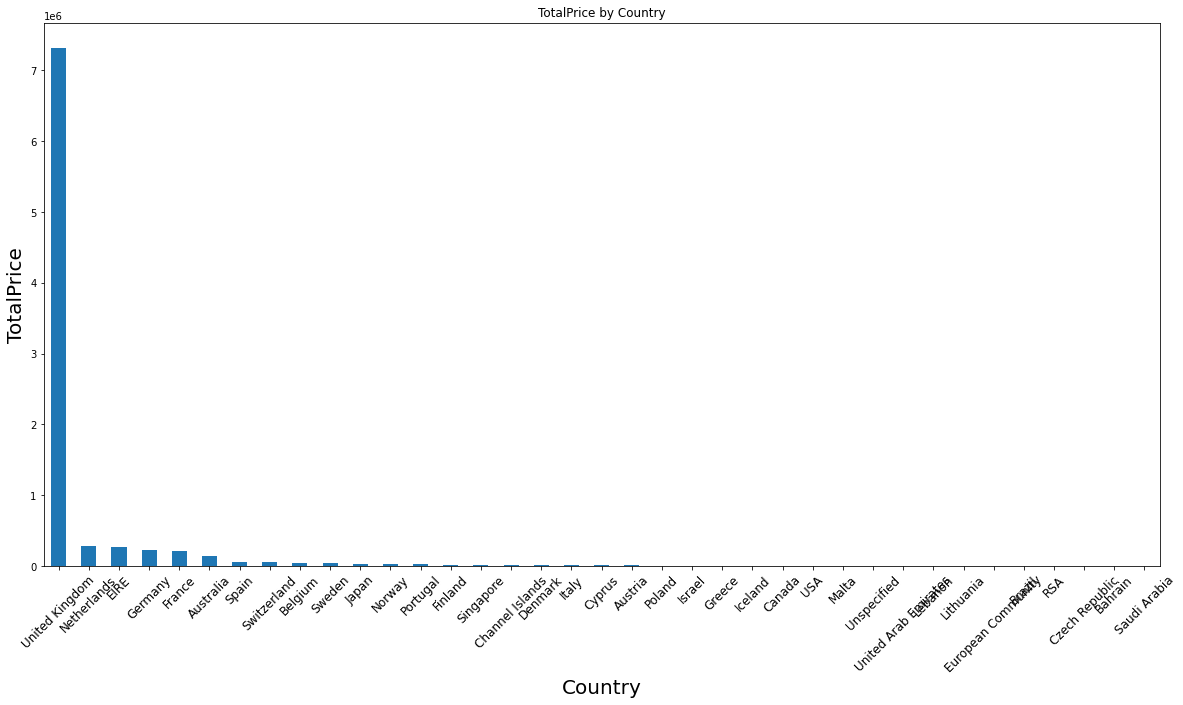

In [7]:
contry_price = retail.groupby('Country').sum()['TotalPrice'].sort_values(ascending=False)
plot = contry_price.plot.bar(figsize=(20,10))
plot.set_title('TotalPrice by Country')
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('TotalPrice',fontsize=20)
plot.set_xticklabels(labels=contry_price.index,fontsize=12,rotation = 45)

#### 그래프 함수

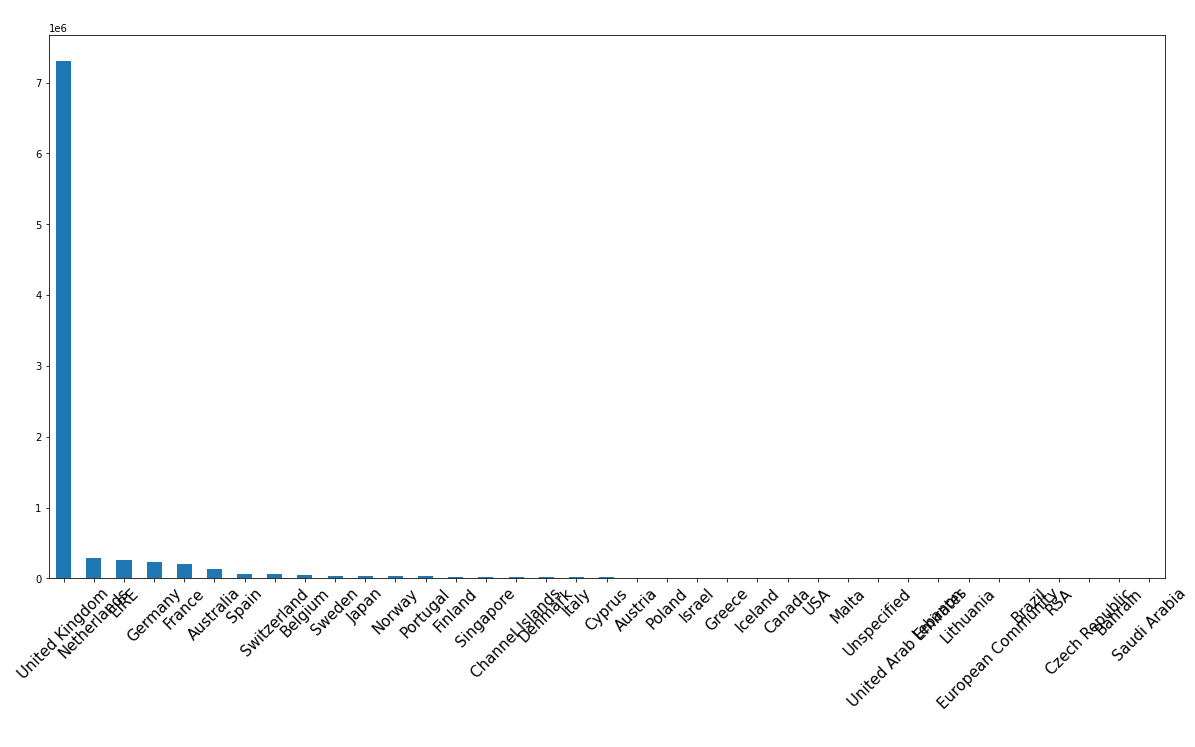

In [52]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=25,color='white')
    plot.set_ylabel(ylabel, fontsize=25,color='white')
    plot.set_title(title, fontsize=28, color='white')
    plot.set_xticklabels(labels=df.index, rotation=rotation,fontsize=30)
    
plot_bar(contry_price, 'Country','TotalPrice', 'TotalPrice by Country')

In [29]:
contry_price/total_price

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

#### 월별 매출

In [11]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [22]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [34]:
monthly_price = retail.set_index('InvoiceDate').groupby(extract_month).sum()['TotalPrice']
monthly_price

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: TotalPrice, dtype: float64

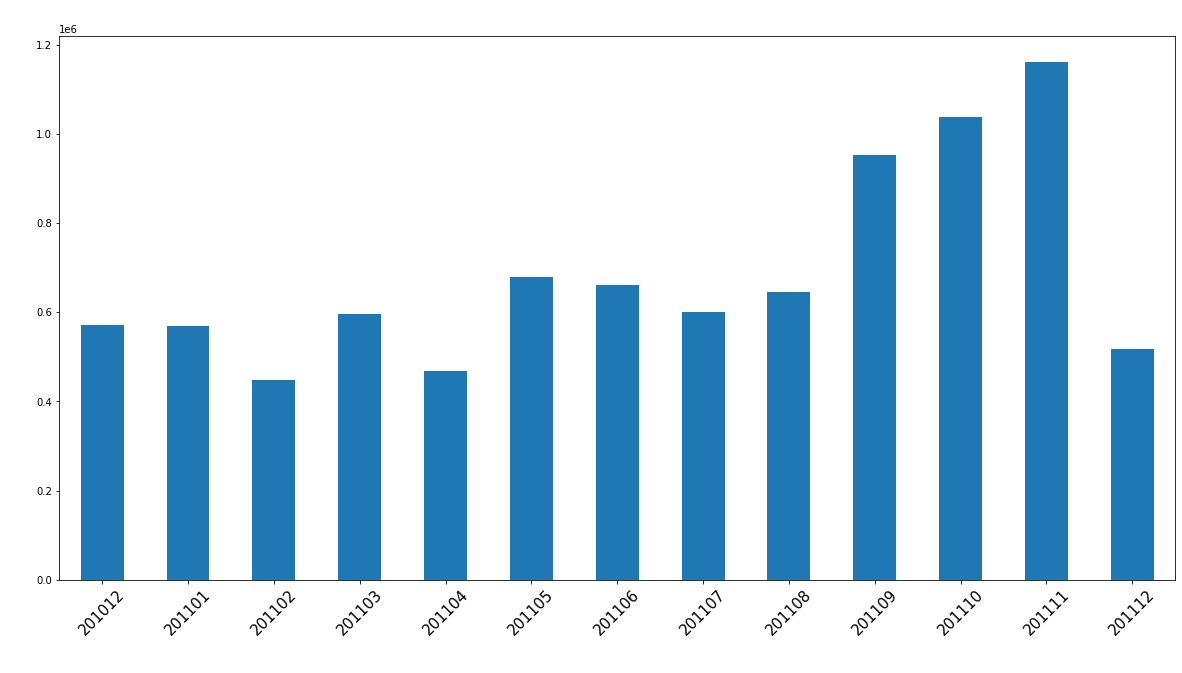

In [54]:
plot_bar(monthly_price,'month','Total_Price','monthly_price')

#### 요일별 매출

In [79]:
dayofweek_price = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['TotalPrice']
dayofweek_price

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: TotalPrice, dtype: float64

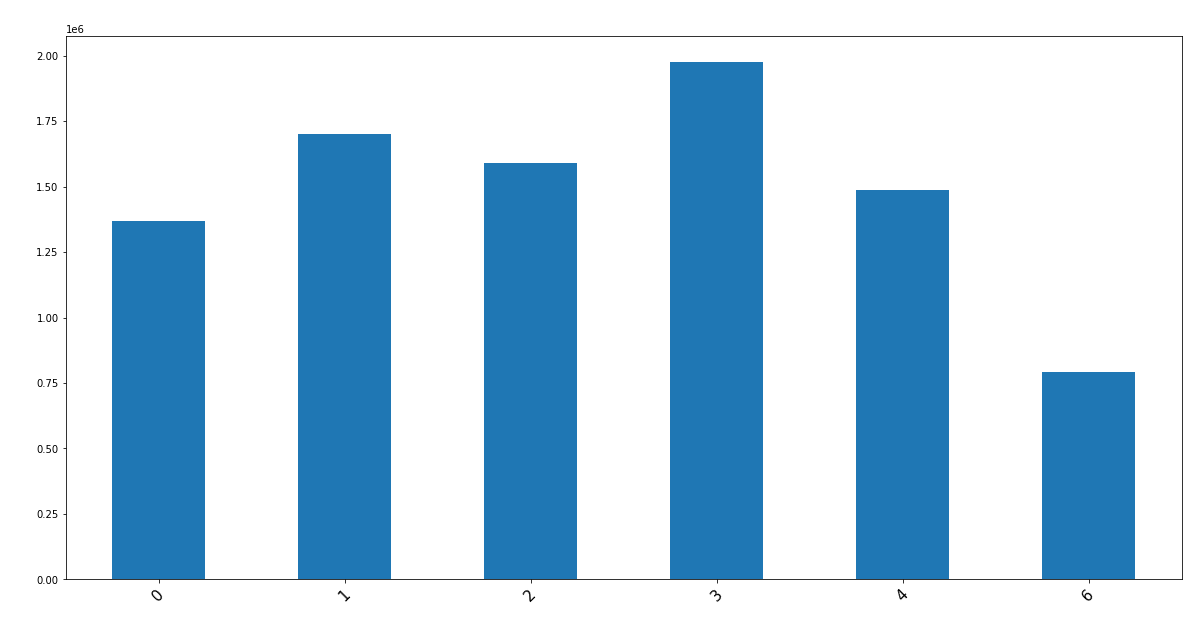

In [80]:
plot_bar(dayofweek_price,'dayofweek','Total_Price','dayofweek_price')

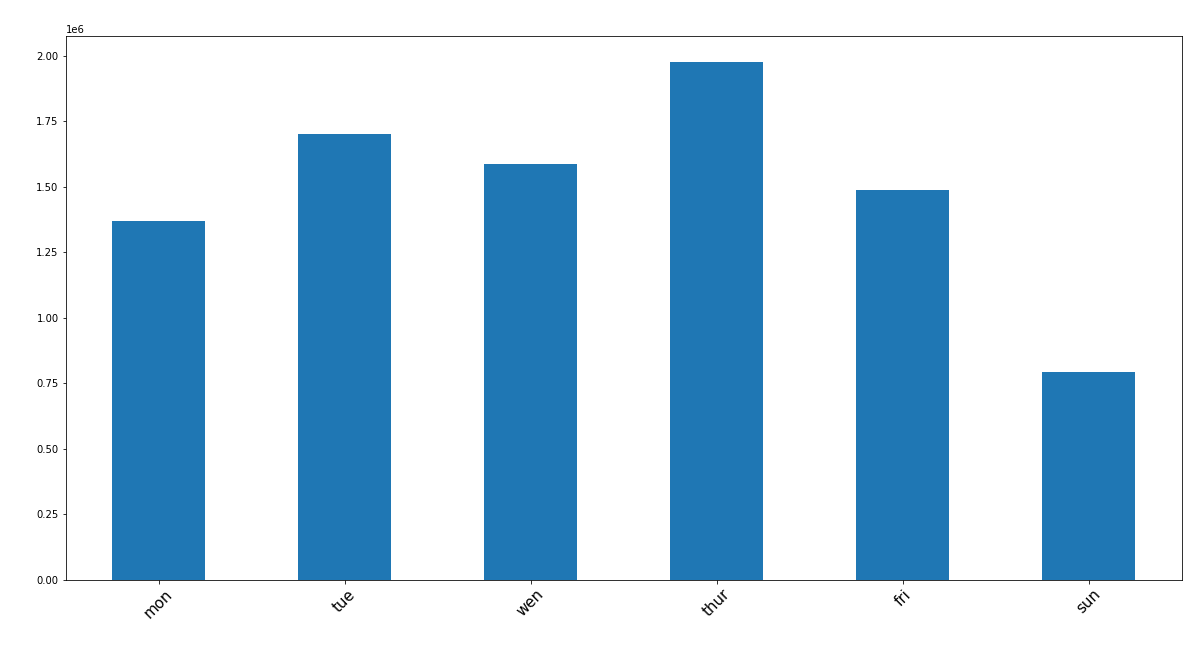

In [81]:
day_of_week = np.array(['mon','tue','wen','thur','fri','sat','sun'])
dayofweek_price.index = day_of_week[dayofweek_price.index]
plot_bar(dayofweek_price,'dayofweek','Total_Price','dayofweek_price')

#### 시간별 매출

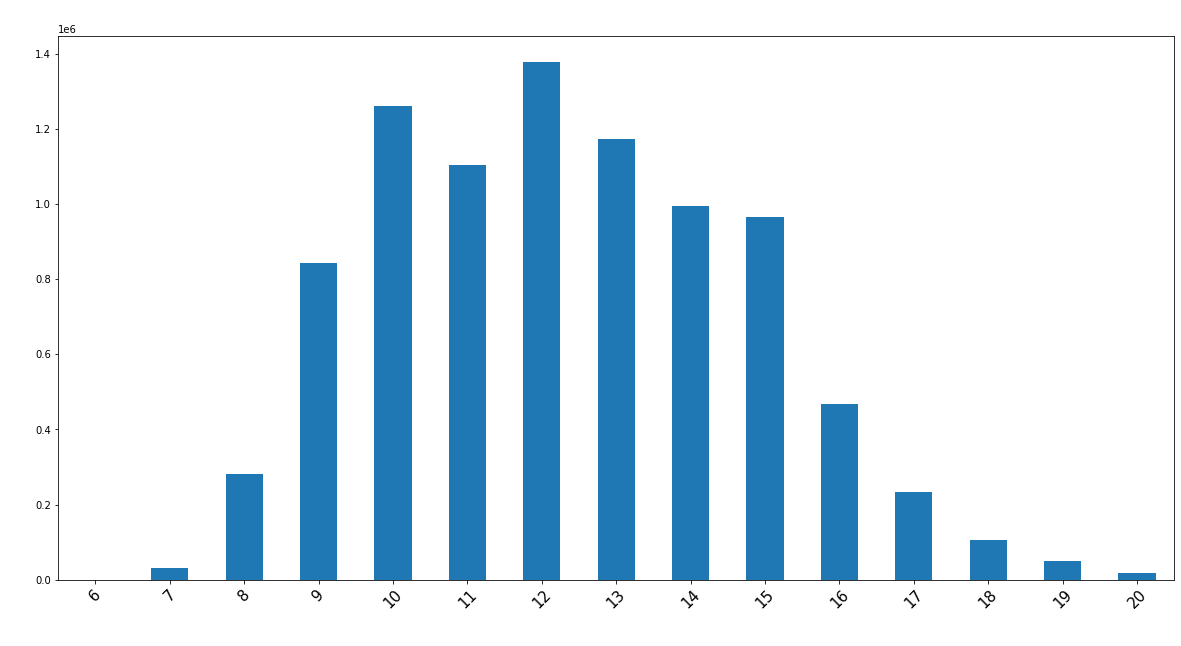

In [85]:
time_price = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['TotalPrice']
plot_bar(time_price,'Time','TimePrice','Time_Price')

### 제품별 판매, 매출 추이

#### Top 10 판매 제품

In [111]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_selling

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

#### Top 10 매출 제품

In [97]:
top_rev = retail.groupby('StockCode').sum()['TotalPrice'].sort_values(ascending=False)
top_rev.head()

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
Name: TotalPrice, dtype: float64

#### top3 매출 품목의 월별 판매량

In [112]:
top5_monthly = retail.set_index('InvoiceDate').groupby(['StockCode',extract_month]).sum()[['Quantity','TotalPrice']].loc[top_selling.index]

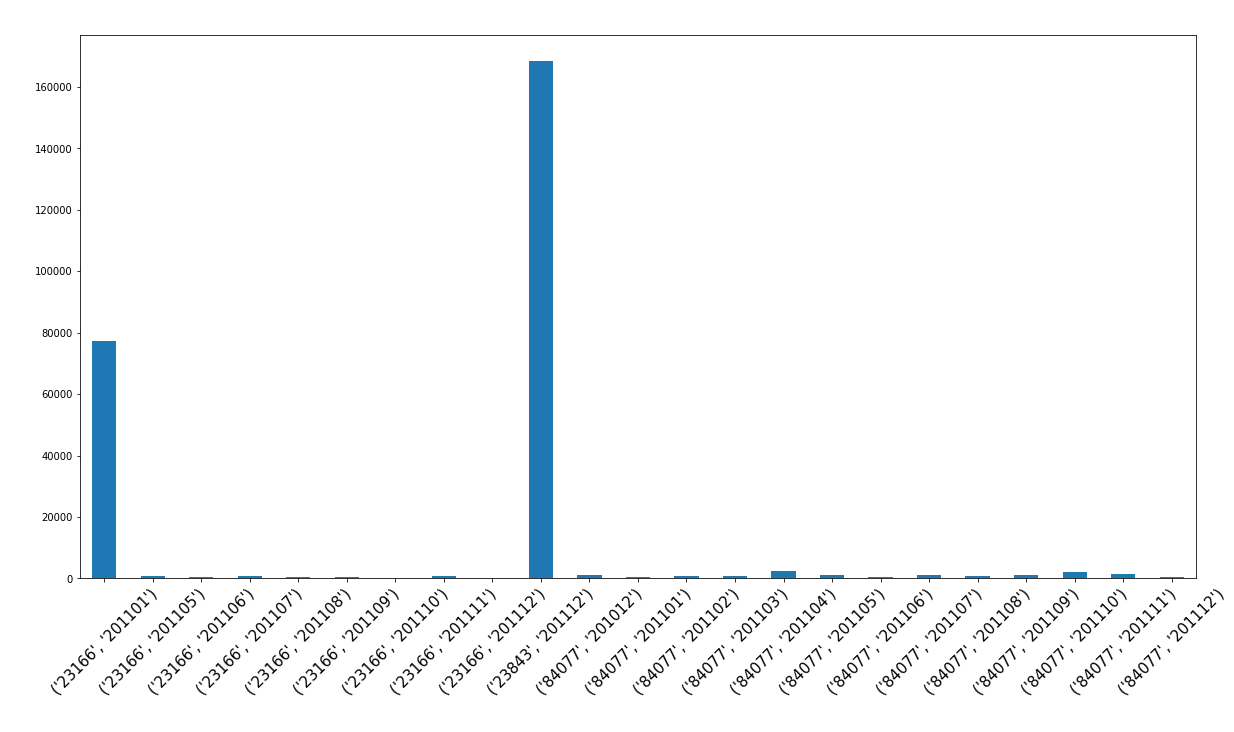

In [113]:
plot_bar(top5_monthly['TotalPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items')